In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data
lqdensities_path = "../data/processed/lqdensities.xlsx"

lqdensities = pd.read_excel(lqdensities_path, index_col="x")
lqdensities.head()

,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,...,t_112,t_113,t_114,t_115,t_116,t_117,t_118,t_119,t_120,t_121
x,,,,,,,,,,,,,,,,,,,,,
0.000000,-3.510057,-4.112028,-3.245852,-3.451768,-3.010697,-2.416859,-2.941917,-3.757795,-4.049503,-2.462951,...,-4.106067,-3.044384,-3.499390,-3.806129,-3.256140,-3.627464,-3.130958,-2.843934,-2.740841,-2.971827
0.005025,-3.831881,-4.280989,-3.595798,-3.755390,-3.047621,-1.405972,-2.863023,-4.039823,-4.279095,-2.480686,...,-4.258328,-3.449396,-3.708159,-3.974514,-3.448629,-3.867496,-3.486383,-2.981364,-2.808421,-3.219460
0.010050,-4.056523,-4.415420,-3.900718,-3.986254,-3.194371,-2.904361,-3.497128,-4.238690,-4.443333,-2.980616,...,-4.371172,-3.737058,-3.837260,-4.091067,-3.596603,-4.040252,-3.728953,-2.983511,-2.846394,-3.431278
0.015075,-4.234897,-4.528753,-4.172718,-4.185588,-3.444439,-3.536240,-4.004996,-4.391251,-4.567315,-3.386732,...,-4.458680,-3.952467,-3.922403,-4.180115,-3.821583,-4.184463,-3.907602,-3.041303,-2.974170,-3.652233
0.020101,-4.385658,-4.626079,-4.403389,-4.360551,-3.745242,-3.871029,-4.325151,-4.514555,-4.664294,-3.631419,...,-4.528478,-4.119930,-3.981792,-4.254348,-4.085199,-4.312487,-4.044709,-3.367491,-3.397260,-3.870436


In [66]:
lqdensities.shape

(200, 121)

In [77]:
u = lqdensities.index.values

In [3]:
def inner_product(f, g, du):
    """
    f, g = vectors
    """
    ip = (f.T @ g)*du
    return ip

In [4]:
def L2norm(f,du):
    norm = np.sqrt(inner_product(f, f, du))
    return norm

In [5]:
Y = lqdensities.reset_index(drop=True)
Y

,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,...,t_112,t_113,t_114,t_115,t_116,t_117,t_118,t_119,t_120,t_121
0,-3.510057,-4.112028,-3.245852,-3.451768,-3.010697,-2.416859,-2.941917,-3.757795,-4.049503,-2.462951,...,-4.106067,-3.044384,-3.499390,-3.806129,-3.256140,-3.627464,-3.130958,-2.843934,-2.740841,-2.971827
1,-3.831881,-4.280989,-3.595798,-3.755390,-3.047621,-1.405972,-2.863023,-4.039823,-4.279095,-2.480686,...,-4.258328,-3.449396,-3.708159,-3.974514,-3.448629,-3.867496,-3.486383,-2.981364,-2.808421,-3.219460
2,-4.056523,-4.415420,-3.900718,-3.986254,-3.194371,-2.904361,-3.497128,-4.238690,-4.443333,-2.980616,...,-4.371172,-3.737058,-3.837260,-4.091067,-3.596603,-4.040252,-3.728953,-2.983511,-2.846394,-3.431278
3,-4.234897,-4.528753,-4.172718,-4.185588,-3.444439,-3.536240,-4.004996,-4.391251,-4.567315,-3.386732,...,-4.458680,-3.952467,-3.922403,-4.180115,-3.821583,-4.184463,-3.907602,-3.041303,-2.974170,-3.652233
4,-4.385658,-4.626079,-4.403389,-4.360551,-3.745242,-3.871029,-4.325151,-4.514555,-4.664294,-3.631419,...,-4.528478,-4.119930,-3.981792,-4.254348,-4.085199,-4.312487,-4.044709,-3.367491,-3.397260,-3.870436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-4.048338,-3.478325,-4.436984,-4.317808,-4.677102,-4.045852,-4.115674,-3.268130,-5.356169,-3.132514,...,-4.273772,-3.854745,-4.184264,-3.545500,-4.099065,-3.318082,-3.785533,-3.906932,-2.535356,-3.377913
196,-3.915486,-3.160963,-4.308809,-4.002791,-4.529087,-3.722712,-3.843236,-3.111856,-5.299856,-2.610218,...,-4.189497,-3.679557,-4.034611,-3.453290,-4.010494,-3.358103,-3.484610,-3.539552,-2.353556,-3.033560
197,-3.875483,-2.634779,-4.141682,-3.438566,-4.352481,-3.194206,-3.408403,-3.138002,-5.237082,-2.432345,...,-4.112210,-3.442267,-3.832875,-3.326320,-3.904869,-3.489829,-2.898233,-2.886054,-2.553237,-2.458018
198,-3.855490,-1.578750,-3.914135,-2.508328,-4.134199,-2.421781,-2.919309,-3.138747,-5.166827,-2.189670,...,-4.029151,-3.138984,-3.552790,-3.151427,-3.769505,-3.557803,-1.559158,-1.597483,-2.052879,-1.308475


In [6]:
Y = Y.values
Y

array([[-3.51005732, -4.11202783, -3.24585238, ..., -2.84393442,
        -2.74084076, -2.97182714],
       [-3.83188144, -4.28098887, -3.59579788, ..., -2.98136418,
        -2.80842106, -3.21945996],
       [-4.05652257, -4.41542047, -3.90071779, ..., -2.98351113,
        -2.8463944 , -3.43127755],
       ...,
       [-3.8754832 , -2.63477868, -4.14168203, ..., -2.88605382,
        -2.55323719, -2.45801793],
       [-3.85549013, -1.57875   , -3.91413484, ..., -1.59748277,
        -2.05287887, -1.30847462],
       [-3.75817918, -2.53869314, -3.57756573, ..., -2.60829955,
        -2.62065777, -2.30794994]], shape=(200, 121))

In [7]:
def super_fun(Y, lag_max, B, alpha, du, p, m, u, select_ncomp, dimension):
    """
    Python translation of the R function 'super_fun'.
    """

    n = N = Y.shape[1]  # columns in Y

    # Mean over time
    Ybar = np.mean(Y, axis=1, keepdims=True)

    # Deviation from mean
    Ydev = Y - Ybar

    ##############################
    # 3. Creating the matrix core
    ##############################

    core = inner_product(Ydev, Ydev, du)
    Kstar_core0 = core[:(n - p), :(n - p)]

    Kstar_core = np.zeros((n - p, n - p, p))
    for k in range(1, p + 1):
        Kstar_core[:, :, k - 1] = core[k:(n - (p - k)), k:(n - (p - k))]

    # Summing matrices
    Kstar_sum = np.sum(Kstar_core, axis=2)

    # Define Kstar
    Kstar = (n - p) ** (-2) * np.dot(Kstar_sum, Kstar_core0)

    ##########################
    # 4. Eigen decomposition #
    ##########################

    eigvals, eigvecs = np.linalg.eig(Kstar)

    # Keep real parts
    tol = 1e-4
    for j in range(min(10, len(eigvals))):
        if abs(np.imag(eigvals[j])) > tol:
            print("Complex eigenvalue found.")

    eigvals = np.real(eigvals)
    eigvecs = np.real(eigvecs)

    # Sort eigenvalues and eigenvectors (descending)
    idx = np.argsort(eigvals)[::-1]
    thetahat = eigvals[idx]
    gammahat = eigvecs[:, idx]

    thetahat_old = thetahat.copy()
    gammahat_old = gammahat.copy()

    #############################
    # Select number of components
    #############################
    if select_ncomp:
        bs_pvalues = np.zeros(lag_max)

        def sampleCols(A):
            idx = np.random.permutation(A.shape[1])
            return A[:, idx]

        for d0 in range(1, lag_max + 1):
            thetahatH0 = np.real(thetahat_old[d0])
            thetahat = np.real(thetahat_old[:d0])
            gammahat = np.real(gammahat_old[:, :d0])

            psihat_root = np.dot(Ydev[:, :(n - p)], gammahat)

            psihat = np.zeros((m, d0))
            for i in range(d0):
                psihat[:, i] = psihat_root[:, i] / L2norm(psihat_root[:, i], du)

            etahat = inner_product(psihat, Ydev, du)
            Yhat = Ybar + np.dot(psihat, etahat)

            epsilonhat = Y - Yhat

            # Bootstrap
            bs_thetahat = np.zeros(B)
            for i in range(B):
                bs_epsilon = sampleCols(epsilonhat)
                # bs_Y = Yhat_fix + bs_epsilon
                bs_Y = Yhat + bs_epsilon
                bs_Ybar = np.mean(bs_Y, axis=1, keepdims=True)
                bs_Ydev = bs_Y - bs_Ybar

                bs_core = inner_product(bs_Ydev, bs_Ydev, du)
                bs_Kstar_core0 = bs_core[:(n - p), :(n - p)]

                bs_Kstar_core = np.zeros((n - p, n - p, p))
                for k in range(1, p + 1):
                    bs_Kstar_core[:, :, k - 1] = bs_core[k:(n - (p - k)), k:(n - (p - k))]

                bs_Kstar_sum = np.sum(bs_Kstar_core, axis=2)
                bs_Kstar = (n - p) ** (-2) * np.dot(bs_Kstar_sum, bs_Kstar_core0)
                bs_eigvals, _ = np.linalg.eig(bs_Kstar)
                bs_eigvals = np.sort(np.real(bs_eigvals))[::-1]
                bs_thetahat[i] = bs_eigvals[d0]

            # Bootstrap p-value
            bs_pvalues[d0 - 1] = np.sum(bs_thetahat >= thetahatH0) / B

        d0_candidates = np.where(bs_pvalues < alpha)[0]
        d0 = d0_candidates[0] + 1 if len(d0_candidates) > 0 else 1

    else:
        d0 = dimension

    ##################################
    # 5. Estimation of Yhat and epsilons
    ##################################

    thetahat = np.real(thetahat_old[:d0])
    gammahat = np.real(gammahat_old[:, :d0])

    psihat_root = np.dot(Ydev[:, :(n - p)], gammahat)

    psihat = np.zeros((m, d0))
    for i in range(d0):
        psihat[:, i] = psihat_root[:, i] / L2norm(psihat_root[:, i], du)

    etahat = inner_product(psihat, Ydev, du)
    Yhat = Ybar + np.dot(psihat, etahat)

    epsilonhat = Y - Yhat

    result = {
        "Y": Y,
        "Ybar": Ybar,
        "thetahat": thetahat,
        "gammahat": gammahat,
        "psihat": psihat,
        "etahat": etahat,
        "Yhat": Yhat,
        "epsilonhat": epsilonhat,
        "u": u,
        "d0": d0
    }

    if select_ncomp == "TRUE":
        result["bs_pvalues"] = bs_pvalues

    return result

In [31]:
type(Y)

numpy.ndarray

In [72]:
m=200
lag_maximum = 6
alpha_val = 0.10
no_boot = 1000
du=0.05
p=5
m=200
D_val = 10

In [9]:
result = super_fun(Y, lag_maximum, no_boot, alpha_val, 
                   du, p, m, lqdensities.index, select_ncomp=False, dimension = D_val)

In [52]:
etahat_est = result["etahat"]
etahat_est.shape

(10, 121)

In [20]:
Ybar_est = result["Ybar"]

In [35]:
psihat_est = result["psihat"]
psihat_est.shape

(200, 10)

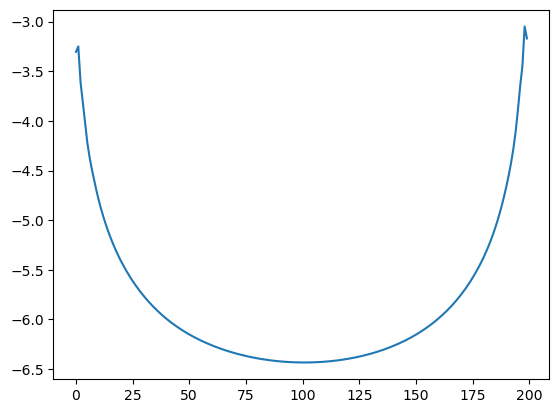

In [21]:
plt.figure()

plt.plot(Ybar_est)

plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
C:\Users\user\AppData\Local\Temp\ipykernel_9628\1037427614.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.title("KLE-based decomposition: $\hat{\psi}$")


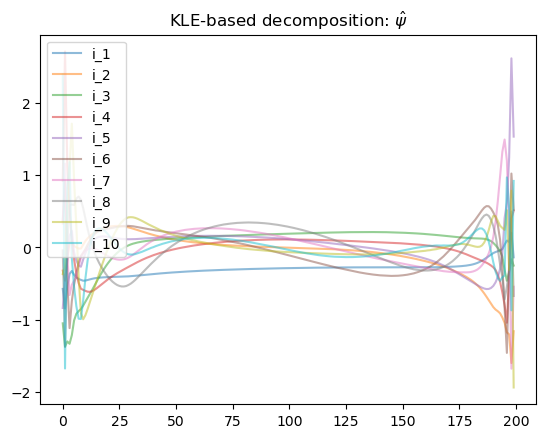

In [51]:
plt.figure()

d = result["psihat"].shape[1]

for psi_index in range(d):
    psi = result["psihat"][:,psi_index]
    plt.plot(psi, alpha=.5, label = f"i_{psi_index+1}")

plt.title("KLE-based decomposition: $\hat{\psi}$")
plt.legend()

plt.show()

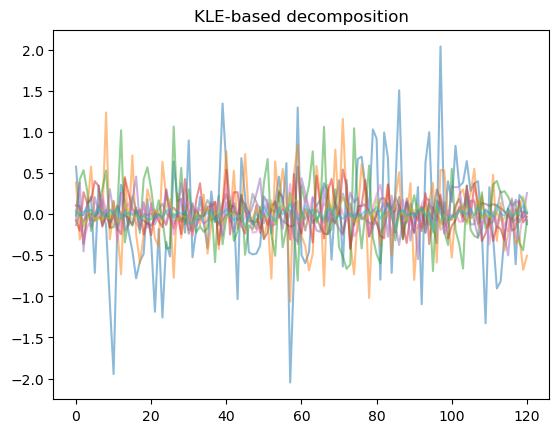

In [53]:
plt.figure()


for psi_index in range(result["etahat"].shape[0]):
    psi = result["etahat"][psi_index,:]
    plt.plot(psi, alpha=.5)

plt.title("KLE-based decomposition")

plt.show()

In [56]:
predicted_values = Ybar_est + psihat_est @ etahat_est

predicted_values.shape

(200, 121)

In [57]:
lqdensities.shape

(200, 121)

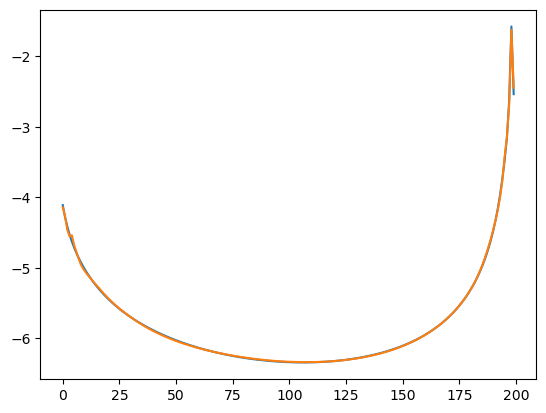

In [65]:
t1 = lqdensities.values[:,1]
t1_est = predicted_values[:, 1]

plt.figure()

plt.plot(t1, label="actual")
plt.plot(t1_est, label="estimate")

plt.show()

In [30]:
def reconstruct_curve(
        Ybar : np.array,
        psi_hat : np.ndarray, 
        scores  : np.array):
    """
    psi_hat: m X d0 matrix
    scores: d0 x h
    """
    Y_t_hat = Ybar + psi_hat @ scores
    return Y

In [32]:
etahat_est

NameError: name 'etahat_est' is not defined

In [ ]:
# Reconstrução de funções
# Yhat.fix_den = den_fore = Ybar_est + psihat_est %*% etahat_pred_val

## FORECAST

In [23]:
from statsmodels.tsa.api import VAR

In [29]:
etahat = result["etahat"]

data = etahat.T

df = pd.DataFrame(data, columns=[f"eta{i+1}" for i in range(etahat.shape[0])])
df

,eta1,eta2,eta3,eta4,eta5,eta6,eta7,eta8,eta9,eta10
0,0.578161,0.386667,-0.016213,-0.077691,-0.063800,0.106360,0.109219,-0.131607,0.051778,0.032237
1,-0.012570,-0.307980,0.424646,-0.200877,0.382953,0.094080,0.024636,0.003016,0.019345,-0.012297
2,-0.009852,-0.098223,0.535630,0.267938,-0.453076,-0.359061,-0.340686,-0.091928,-0.138233,0.031228
3,0.110975,0.051495,0.277321,0.134518,0.147228,-0.023806,-0.154377,0.020170,-0.083365,0.046711
4,0.214487,0.580300,-0.203446,0.176587,-0.150051,0.005699,-0.077618,-0.065183,0.053200,0.051560
...,...,...,...,...,...,...,...,...,...,...
116,0.172870,0.050320,0.103876,-0.198833,-0.006399,-0.065045,0.194635,-0.097363,0.026971,-0.024711
117,-0.608759,-0.356348,0.148795,-0.169882,0.176659,0.061148,-0.269547,-0.060184,-0.030782,0.006885
118,0.234016,-0.274028,-0.350528,0.168894,0.125342,-0.097610,-0.295147,-0.003192,0.048774,0.020428
119,0.169986,-0.677416,-0.438697,-0.099971,-0.043220,0.029670,0.034041,-0.043948,0.217167,0.106492


In [25]:
# Fit VAR with automatic lag selection using AIC
model = VAR(df)
lag_selection = model.select_order(maxlags=10)  # You can increase maxlags if needed
print(lag_selection.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -35.30     -35.05*   4.680e-16      -35.20
1       -34.46      -31.77   1.090e-15      -33.37
2       -33.87      -28.74   2.045e-15      -31.79
3       -33.20      -25.63   4.445e-15      -30.13
4       -32.84      -22.83   7.896e-15      -28.78
5       -32.91      -20.46   1.072e-14      -27.86
6       -33.01      -18.12   1.798e-14      -26.97
7       -34.27      -16.94   1.382e-14      -27.24
8       -36.53      -16.75   7.243e-15      -28.51
9       -39.46      -17.25   6.078e-15      -30.45
10     -53.66*      -29.00  1.140e-18*     -43.66*
--------------------------------------------------


In [26]:
# Best lag according to AIC
best_lag = lag_selection.aic
print(f"Selected lag (AIC): {best_lag}")

Selected lag (AIC): 10


In [27]:
# Fit final model with chosen lag
var_model = model.fit(best_lag)
print(var_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 13, Nov, 2025
Time:                     00:08:16
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -29.0033
Nobs:                     111.000    HQIC:                  -43.6560
Log likelihood:           2412.97    FPE:                1.13972e-18
AIC:                     -53.6576    Det(Omega_mle):     1.76470e-21
--------------------------------------------------------------------
Results for equation eta1
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.077103         0.089950            0.857           0.391
L1.eta1          -0.736461         0.390594           -1.885           0.059
L1.eta2          -0.288328         0.320032           -0.901           0.368


    require(vars)
    score_object = t(etahat_est)
    colnames(score_object) = 1:selected_d0
    
    if(selected_d0 == 1)
    {
        etahat_pred_val = forecast(auto.arima(as.numeric(score_object)), h = 1)$mean
    }  
    else
    {
        VAR_mod = VARselect(score_object)
        etahat_pred = predict(VAR(y = score_object, p = min(VAR_mod$selection[3], 3), type = VAR_type), n.ahead = 1)
        etahat_pred_val = as.matrix(sapply(1:selected_d0, function(t) (etahat_pred$fcst[[t]])[1]))
    }
    Yhat.fix_den = den_fore = Ybar_est + psihat_est %*% etahat_pred_val

In [28]:
result["psihat"]

array([[-0.57336485, -0.32030536, -1.04940232, ..., -0.04140452,
        -0.36742418,  2.39455624],
       [-0.84411504, -0.45982875, -1.37242164, ..., -1.37353249,
        -0.27068825, -1.67391745],
       [-0.53376811, -0.1410391 , -1.29964175, ...,  0.03147031,
         0.54207627,  0.82030646],
       ...,
       [ 0.07582013, -1.20208794, -0.34213038, ..., -0.31400744,
        -0.31110862,  0.54758165],
       [ 0.20278196, -1.59851014, -0.1643475 , ...,  0.49600942,
         0.78408482, -0.86980401],
       [-0.13708074, -1.15861293, -0.25109634, ..., -0.67135881,
        -1.93626777,  0.91900274]], shape=(200, 10))

In [ ]:
def inner_product(f, g, du):
    return np.dot(f.T, g) * du

def L2norm(f, du):
    return np.sqrt(inner_product(f, f, du))


###########################################
# Main Class
###########################################

class SuperFun:
    def __init__(self, Y):
        self.Y = Y
        self.m, self.T = Y.shape

        # filled after fit()
        self.Ybar = None
        self.thetahat = None
        self.gammahat = None
        self.psihat = None
        self.etahat = None
        self.Yhat = None
        self.epsilonhat = None
        self.d0 = None
        self.u = None
        self.bs_pvalues = None
        self.fitted_values = None

    ########################################################################

    # Example
    m=200
    lag_maximum = 6
    alpha_val = 0.10
    no_boot = 1000
    du=0.05
    p=5
    m=200
    D_val = 10

    model = SuperFun(Y.values)
    model.fit(lag_max=6, B=1000, alpha=0.10, du=0.05, p=5, m=lqdensities.shape[0],
                u=u, select_ncomp=False,dimension=10
    )

    def fit(self, lag_max, B, alpha, du, p, m, u,
            select_ncomp=False, dimension=None):

        Y = self.Y
        n = N = Y.shape[1]
        self.u = u

        # Mean and deviations
        Ybar = np.mean(Y, axis=1, keepdims=True)
        Ydev = Y - Ybar

        ##############################
        # Core matrix
        ##############################

        core = inner_product(Ydev, Ydev, du)
        Kstar_core0 = core[:(n - p), :(n - p)]

        Kstar_core = np.zeros((n - p, n - p, p))
        for k in range(1, p + 1):
            Kstar_core[:, :, k - 1] = core[k:(n - (p - k)), k:(n - (p - k))]

        Kstar_sum = np.sum(Kstar_core, axis=2)
        Kstar = (n - p) ** (-2) * np.dot(Kstar_sum, Kstar_core0)

        ##################
        # Eigen-decomp
        ##################

        eigvals, eigvecs = np.linalg.eig(Kstar)
        eigvals = np.real(eigvals)
        eigvecs = np.real(eigvecs)

        # sort descending
        idx = np.argsort(eigvals)[::-1]
        thetahat_old = eigvals[idx]
        gammahat_old = eigvecs[:, idx]

        #############################
        # Select number of components
        #############################

        if select_ncomp:
            bs_pvalues = np.zeros(lag_max)

            def sampleCols(A):
                idx = np.random.permutation(A.shape[1])
                return A[:, idx]

            for d0 in range(1, lag_max + 1):
                thetahatH0 = thetahat_old[d0]
                gammahat = gammahat_old[:, :d0]

                psihat_root = np.dot(Ydev[:, :(n - p)], gammahat)

                psihat = np.zeros((m, d0))
                for i in range(d0):
                    psihat[:, i] = psihat_root[:, i] / L2norm(psihat_root[:, i], du)

                etahat = inner_product(psihat, Ydev, du)
                Yhat = Ybar + np.dot(psihat, etahat)
                epsilonhat = Y - Yhat

                bs_thetahat = np.zeros(B)
                for b in range(B):
                    bs_epsilon = sampleCols(epsilonhat)
                    bs_Y = Yhat + bs_epsilon

                    bs_Ybar = np.mean(bs_Y, axis=1, keepdims=True)
                    bs_Ydev = bs_Y - bs_Ybar

                    bs_core = inner_product(bs_Ydev, bs_Ydev, du)
                    bs_Kstar_core0 = bs_core[:(n - p), :(n - p)]

                    bs_Kstar_core = np.zeros((n - p, n - p, p))
                    for k in range(1, p + 1):
                        bs_Kstar_core[:, :, k - 1] = bs_core[k:(n - (p - k)),
                                                             k:(n - (p - k))]

                    bs_Kstar_sum = np.sum(bs_Kstar_core, axis=2)
                    bs_Kstar = (n - p) ** (-2) * np.dot(bs_Kstar_sum, bs_Kstar_core0)

                    bs_eigs, _ = np.linalg.eig(bs_Kstar)
                    bs_thetahat[b] = np.sort(np.real(bs_eigs))[::-1][d0]

                bs_pvalues[d0 - 1] = np.mean(bs_thetahat >= thetahatH0)

            d0_candidates = np.where(bs_pvalues < alpha)[0]
            d0 = d0_candidates[0] + 1 if len(d0_candidates) > 0 else 1

            self.bs_pvalues = bs_pvalues

        else:
            d0 = dimension

        ###############################################
        # Final estimation (Yhat, scores, psi)
        ###############################################

        thetahat = thetahat_old[:d0]
        gammahat = gammahat_old[:, :d0]

        psihat_root = np.dot(Ydev[:, :(n - p)], gammahat)

        psihat = np.zeros((m, d0))
        for i in range(d0):
            psihat[:, i] = psihat_root[:, i] / L2norm(psihat_root[:, i], du)

        etahat = inner_product(psihat, Ydev, du)
        Yhat = Ybar + np.dot(psihat, etahat)
        epsilonhat = Y - Yhat

        ###############################################
        # Store results
        ###############################################
        self.Ybar = Ybar
        self.thetahat = thetahat
        self.gammahat = gammahat
        self.psihat = psihat
        self.etahat = etahat
        self.Yhat = Yhat
        self.epsilonhat = epsilonhat
        self.d0 = d0
        self.fitted_values = self.Ybar + self.psihat @ self.etahat

        return self  # chaining

    def plot_psihat(self):
        """Plot estimated spatial basis functions ψ_i(u)."""
        if self.psihat is None:
            raise ValueError("Model not fitted yet.")

        d = self.psihat.shape[1]

        plt.figure()
        for i in range(d):
            plt.plot(self.u, self.psihat[:, i], alpha=0.6, label=f"ψ_{i+1}")

        plt.title("KLE-based decomposition: $\\hat{\\psi}$")
        plt.legend()
        plt.show()

    def plot_etahat(self):
        """Plot temporal score functions η_i(t)."""
        if self.etahat is None:
            raise ValueError("Model not fitted yet.")

        plt.figure()
        for i in range(self.etahat.shape[0]):
            plt.plot(self.etahat[i, :], alpha=0.6)

        plt.title("KLE-based temporal scores $\\hat{\\eta}$")
        plt.show()

    def predict(self, etahat_values):
        """Return reconstructed curves Yhat = Ybar + psihat @ etahat."""
        if self.Ybar is None or self.psihat is None or self.etahat is None:
            raise ValueError("Model not fitted yet.")
        return self.Ybar + self.psihat @ etahat_values

In [87]:
m=200
lag_maximum = 6
alpha_val = 0.10
no_boot = 1000
du=0.05
p=5
m=200
D_val = 10

model = SuperFun(lqdensities.values)
model.fit(
    lag_max=lag_maximum,
    B=no_boot,
    alpha=0.10,
    du=0.05,
    p=5,
    m=lqdensities.shape[0],
    u=u,
    select_ncomp=False,
    dimension=10
)

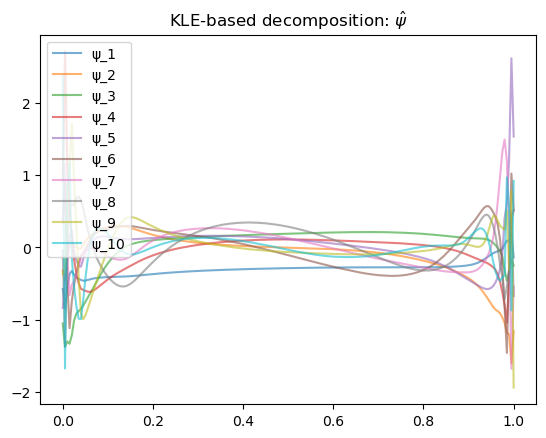

In [89]:
model.plot_psihat()

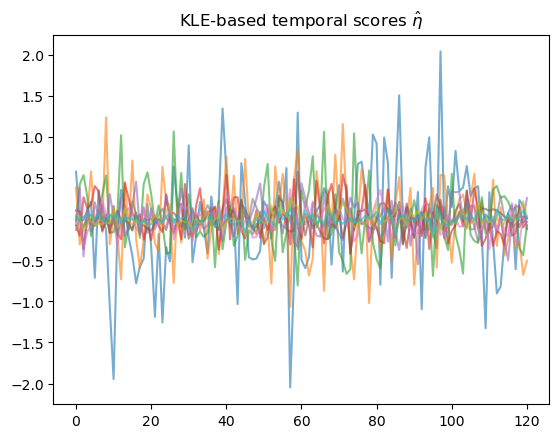

In [90]:
model.plot_etahat()

In [91]:
Y_pred = model.fitted_values

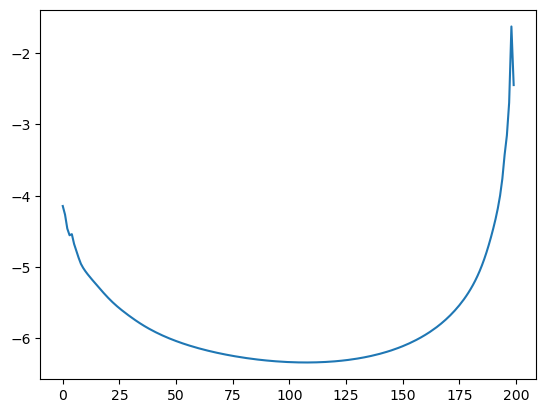

In [92]:
plt.figure()

plt.plot(Y_pred[:,1])

In [ ]:
# ============================================================
# Auxiliary Functions
# ============================================================

def inner_product(f, g, du):
    """
    Compute the L^2 inner product ⟨f, g⟩ = ∫ f(u) g(u) du
    in its discrete approximation.

    Parameters
    ----------
    f : ndarray (m, k1)
        First function(s) evaluated on a grid.
    g : ndarray (m, k2)
        Second function(s) evaluated on the same grid.
    du : float
        Grid spacing.

    Returns
    -------
    ndarray (k1, k2)
        Matrix of inner products.
    """
    return np.dot(f.T, g) * du


def L2norm(f, du):
    """
    Compute the L^2 norm of a function vector f.

    Parameters
    ----------
    f : ndarray (m,)
        Function values on a grid.
    du : float
        Grid spacing.

    Returns
    -------
    float
        The L^2 norm.
    """
    return np.sqrt(inner_product(f, f, du))


# ============================================================
# Main Class
# ============================================================

class SuperFun:
    """
    Implements the estimation of a KLE-based dynamic factor model
    for functional time series Y(u, t).

    This class takes as input a matrix Y of shape (m, T), where:
        m = number of grid points
        T = number of time points (curves)

    After calling `.fit(...)`, the class computes and stores:
        - Ybar          : mean curve
        - psihat        : estimated spatial basis functions
        - etahat        : temporal score series
        - thetahat      : eigenvalues
        - gammahat      : eigenvectors of the K* operator
        - Yhat          : fitted reconstruction
        - fitted_values : same as Yhat
        - epsilonhat    : residual curves
        - d0            : selected dimension

    Methods
    -------
    fit(...)
        Fit the dynamic KLE model.

    plot_psihat()
        Plot the spatial basis functions.

    plot_etahat()
        Plot the temporal scores.

    predict(etahat_values)
        Reconstruct curves from arbitrary scores.
    
    Example
    -------
    model = SuperFun(Y.values)
    model.fit(lag_max=6, B=1000, alpha=0.10, du=0.05, p=5, m=Y.shape[0],
                u=Y.index.values, select_ncomp=False,dimension=10
    )
    scores_pred = model.forecast_scores(h=1)
    predicted_curves = model.predict(scores_pred)
    """

    # ------------------------------------------------------------

    def __init__(self, Y):
        """
        Initialize the model with data.

        Parameters
        ----------
        Y : ndarray (m, T)
            Functional time series sample evaluated on an m-point grid.
        """
        self.Y = Y
        self.m, self.T = Y.shape

        # Filled after fit()
        self.Ybar = None
        self.thetahat = None
        self.gammahat = None
        self.psihat = None
        self.etahat = None
        self.Yhat = None
        self.epsilonhat = None
        self.d0 = None
        self.u = None
        self.bs_pvalues = None
        self.fitted_values = None

    # ------------------------------------------------------------

    def fit(self, lag_max, B, alpha, du, p, m, u,
            select_ncomp=False, dimension=None):
        """
        Fit the dynamic KLE model.

        Parameters
        ----------
        lag_max : int
            Maximum number of components to test under bootstrapping.
        
        B : int
            Number of bootstrap replications.

        alpha : float
            Significance level for component selection.

        du : float
            Grid spacing in the domain of the curves.

        p : int
            Time-lag order used to form K*.

        m : int
            Number of grid points (redundant, but kept for compatibility).

        u : ndarray (m,)
            Grid support.

        select_ncomp : bool, optional (default=False)
            Whether to run the bootstrap procedure to determine d0.

        dimension : int, optional
            Fixed number of components to extract (used only if select_ncomp=False).

        Returns
        -------
        self : SuperFun
            The fitted model.
        """
        Y = self.Y
        n = N = Y.shape[1]
        self.u = u

        # Mean and deviations
        Ybar = np.mean(Y, axis=1, keepdims=True)
        Ydev = Y - Ybar

        # --------------------------------------------------------
        # Step 1 — Build core matrices
        # --------------------------------------------------------

        core = inner_product(Ydev, Ydev, du)
        Kstar_core0 = core[:(n - p), :(n - p)]

        Kstar_core = np.zeros((n - p, n - p, p))
        for k in range(1, p + 1):
            Kstar_core[:, :, k - 1] = core[k:(n - (p - k)), k:(n - (p - k))]

        Kstar_sum = np.sum(Kstar_core, axis=2)
        Kstar = (n - p) ** (-2) * np.dot(Kstar_sum, Kstar_core0)

        # --------------------------------------------------------
        # Step 2 — Eigen-decomposition
        # --------------------------------------------------------

        eigvals, eigvecs = np.linalg.eig(Kstar)
        eigvals = np.real(eigvals)
        eigvecs = np.real(eigvecs)

        # Sort descending
        idx = np.argsort(eigvals)[::-1]
        thetahat_old = eigvals[idx]
        gammahat_old = eigvecs[:, idx]

        # --------------------------------------------------------
        # Step 3 — Select number of components (optional bootstrap)
        # --------------------------------------------------------

        if select_ncomp:
            bs_pvalues = np.zeros(lag_max)

            def sampleCols(A):
                return A[:, np.random.permutation(A.shape[1])]

            for d0 in range(1, lag_max + 1):
                thetahatH0 = thetahat_old[d0]
                gammahat = gammahat_old[:, :d0]

                psihat_root = np.dot(Ydev[:, :(n - p)], gammahat)

                psihat = np.zeros((m, d0))
                for i in range(d0):
                    psihat[:, i] = psihat_root[:, i] / L2norm(psihat_root[:, i], du)

                etahat = inner_product(psihat, Ydev, du)
                Yhat = Ybar + np.dot(psihat, etahat)
                epsilonhat = Y - Yhat

                # Bootstrap eigenvalues
                bs_thetahat = np.zeros(B)
                for b in range(B):
                    bs_epsilon = sampleCols(epsilonhat)
                    bs_Y = Yhat + bs_epsilon

                    bs_Ybar = np.mean(bs_Y, axis=1, keepdims=True)
                    bs_Ydev = bs_Y - bs_Ybar

                    bs_core = inner_product(bs_Ydev, bs_Ydev, du)
                    bs_Kstar_core0 = bs_core[:(n - p), :(n - p)]

                    bs_Kstar_core = np.zeros((n - p, n - p, p))
                    for k in range(1, p + 1):
                        bs_Kstar_core[:, :, k - 1] = bs_core[k:(n - (p - k)),
                                                             k:(n - (p - k))]

                    bs_Kstar_sum = np.sum(bs_Kstar_core, axis=2)
                    bs_Kstar = (n - p) ** (-2) * np.dot(bs_Kstar_sum, bs_Kstar_core0)

                    bs_eigs, _ = np.linalg.eig(bs_Kstar)
                    bs_thetahat[b] = np.sort(np.real(bs_eigs))[::-1][d0]

                bs_pvalues[d0 - 1] = np.mean(bs_thetahat >= thetahatH0)

            d0_candidates = np.where(bs_pvalues < alpha)[0]
            d0 = d0_candidates[0] + 1 if len(d0_candidates) > 0 else 1

            self.bs_pvalues = bs_pvalues

        else:
            d0 = dimension

        # --------------------------------------------------------
        # Step 4 — Final estimation
        # --------------------------------------------------------

        thetahat = thetahat_old[:d0]
        gammahat = gammahat_old[:, :d0]

        psihat_root = np.dot(Ydev[:, :(n - p)], gammahat)

        psihat = np.zeros((m, d0))
        for i in range(d0):
            psihat[:, i] = psihat_root[:, i] / L2norm(psihat_root[:, i], du)

        etahat = inner_product(psihat, Ydev, du)
        Yhat = Ybar + np.dot(psihat, etahat)
        epsilonhat = Y - Yhat

        # Store results
        self.Ybar = Ybar
        self.thetahat = thetahat
        self.gammahat = gammahat
        self.psihat = psihat
        self.etahat = etahat
        self.Yhat = Yhat
        self.epsilonhat = epsilonhat
        self.d0 = d0

        # Prediction storage (Ybar + ψ * η_pred_)
        self.fitted_values = self.Ybar + self.psihat @ self.etahat

        return self

    # ------------------------------------------------------------
    # Plotting Methods
    # ------------------------------------------------------------

    def plot_psihat(self):
        """
        Plot spatial basis functions ψ_i(u).

        Produces a line plot of estimated eigenfunctions on the grid.
        """
        if self.psihat is None:
            raise ValueError("Model not fitted yet.")

        d = self.psihat.shape[1]

        plt.figure()
        for i in range(d):
            plt.plot(self.u, self.psihat[:, i], alpha=0.6, label=f"ψ_{i+1}")

        plt.title("KLE-based decomposition: $\\hat{\\psi}$")
        plt.legend()
        plt.show()

    def plot_etahat(self):
        """
        Plot temporal score series η_i(t).

        Produces a line plot for each score over time.
        """
        if self.etahat is None:
            raise ValueError("Model not fitted yet.")

        plt.figure()
        for i in range(self.etahat.shape[0]):
            plt.plot(self.etahat[i, :], alpha=0.6)

        plt.title("KLE-based temporal scores $\\hat{\\eta}$")
        plt.show()

    # ------------------------------------------------------------
    # Prediction Method
    # ------------------------------------------------------------

    def predict(self, etahat_values):
        """
        Reconstruct curves from temporal scores.

        Compute:
            Ŷ = Ȳ + ψ  η

        Parameters
        ----------
        etahat_values : ndarray (d0, T)
            Scores used to reconstruct the curves.

        Returns
        -------
        ndarray (m, T)
            Reconstructed functional observations.
        """
        if self.Ybar is None or self.psihat is None or self.etahat is None:
            raise ValueError("Model not fitted yet.")
            

        return self.Ybar + self.psihat @ etahat_values

    def forecast_scores(self, h=1, max_var_lag=3, var_type="c"):
        """
        Forecast the next functional observation using ARIMA (if d0=1)
        or VAR (if d0>1), following the logic of the original R code.

        Parameters
        ----------
        h : int, default=1
            Forecast horizon.
        max_var_lag : int, default=3
            Maximum lag for VAR model.
        var_type : {"const", "none", "trend", "both"}
            Equivalent to R's VAR type. Automatically translated
            to statsmodels-compatible trend codes.

        Returns
        -------
        etahat_pred_val : ndarray (d0, h)
            Forecasted score vectors.
        Yhat_future : ndarray (m, h)
            Forecasted functional curves.
        """

        import numpy as np
        from statsmodels.tsa.arima.model import ARIMA
        from statsmodels.tsa.api import VAR

        if self.etahat is None:
            raise ValueError("Model must be fitted before forecasting.")

        score_object = self.etahat
        d0, T = score_object.shape

        # -------------------------------------------------------
        # Case 1: Univariate ARIMA
        # -------------------------------------------------------
        if d0 == 1:
            series = score_object.flatten()
            model = ARIMA(series, order=(1, 0, 0))
            fitted = model.fit()
            forecast_vals = fitted.forecast(steps=h)
            etahat_pred_val = forecast_vals.reshape(1, h)

        # -------------------------------------------------------
        # Case 2: Multivariate VAR
        # -------------------------------------------------------
        else:
            score_Td = score_object.T  # shape: T × d0

            var_model = VAR(score_Td)
            sel = var_model.select_order(maxlags=max_var_lag)

            chosen_lag = sel.selected_orders["aic"]
            if chosen_lag is None:
                chosen_lag = 1
            chosen_lag = min(chosen_lag, max_var_lag)

            var_fit = var_model.fit(maxlags=chosen_lag, trend=var_type)

            # FIX: use endog, not y
            pred = var_fit.forecast(var_fit.endog, steps=h)

            etahat_pred_val = pred.T

        return etahat_pred_val

In [100]:
m=200
lag_maximum = 6
alpha_val = 0.10
no_boot = 1000
du=0.05
p=5
m=200
D_val = 10

model = SuperFun(lqdensities.values)
model.fit(
    lag_max=lag_maximum,
    B=no_boot,
    alpha=0.10,
    du=0.05,
    p=5,
    m=lqdensities.shape[0],
    u=u,
    select_ncomp=False,
    dimension=10
)

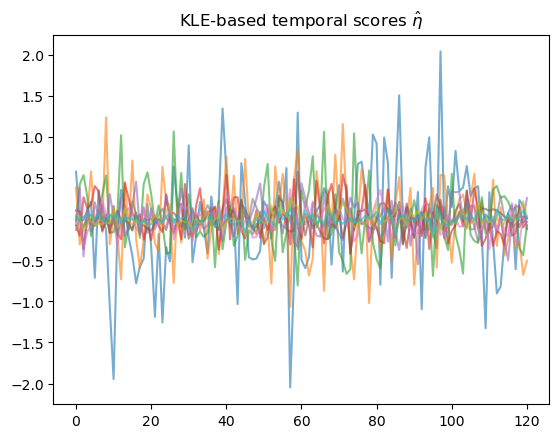

In [102]:
model.plot_etahat()

In [101]:

scores_pred = model.forecast_scores(h=1)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [109]:
import sys
import os
import json
from pathlib import Path
import numpy as np
import pandas as pd

# Add the project root (parent of "notebooks") to sys.path
# root = Path.cwd().parent
root = Path.cwd()
if str(root) not in sys.path:
    sys.path.append(str(root))

# Reads json file of densities with support values
json_file_path = root / "../data/processed/lqdensities.json"
with open(json_file_path, 'r') as j:
     densities = json.loads(j.read())

In [110]:
densities["1"].keys()

dict_keys(['lqd_support', 'lqd_c', 'lqd'])

In [113]:
c_t = []
c_values = []
for t in densities.keys():
    c_t.append((t,densities[t]['lqd_c']))
    c_values.append(densities[t]['lqd_c'])

In [114]:
c_values

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [118]:
transformed_data = {'etahat': model.etahat, 'c': c_t}

In [120]:
np.savez("../data/processed/K_dFPC_scores.npz", etahat_d0_T=model.etahat, c_T=c_t)

In [121]:
data = np.load("../data/processed/K_dFPC_scores.npz")

matrix = data["etahat_d0_T"]
array  = data["c_T"]